### 1.Problem Statement

##### Classify The Drug Based On their Features

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import PowerTransformer,FunctionTransformer

### 2. Collect The Data Based On Problem Statement

In [40]:
data = pd.read_csv("drug200.csv")

In [41]:
df = data.copy()

In [42]:
df.info() # it shows the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [43]:
df["BP"] = data["BP"].astype("category") # convert the data types object to category
df["Cholesterol"] = data["Cholesterol"].astype("category")

### 3.EDA(Exploratoty Data Analysis)

In [44]:
df.duplicated().sum() # find the dupilicated values

0

In [45]:
df.isnull().sum() # find The null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [46]:
df["BP"].unique() # find unique values of "bp" column

['HIGH', 'LOW', 'NORMAL']
Categories (3, object): ['HIGH', 'LOW', 'NORMAL']

In [47]:
df["Cholesterol"].unique() # find unique values of "Cholesterol" column

['HIGH', 'NORMAL']
Categories (2, object): ['HIGH', 'NORMAL']

In [48]:
df["Drug"].unique() # find unique values of "Drug" column

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

### 4. preprocessing

In [49]:
fv = df.iloc[:,:-1]    # split data into features and class variables
cv = df.iloc[:,-1]

In [50]:
fv


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [51]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()   # give values in cv using the label encoder
cv = lb.fit_transform(cv)

In [52]:
cv

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

### EDA 

In [53]:
# find the relation between features
# Correlation matrix
corr_matrix = fv.corr()
corr_matrix

C:\Users\Welcome\AppData\Local\Temp\ipykernel_26940\74013967.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fv.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


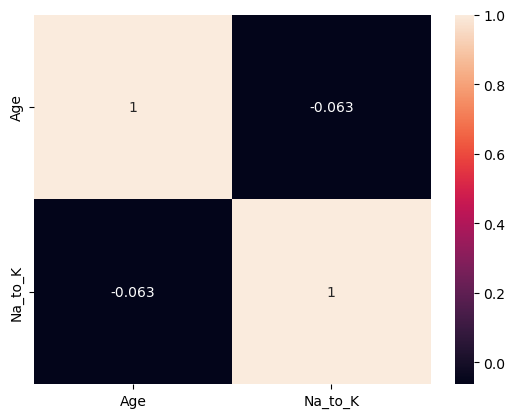

In [54]:
sns.heatmap(corr_matrix,annot=True) # find the relation between features
plt.show()

### Feature Engineering

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer

In [56]:
# split the data into train and test based on fv and cv
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify = cv)

In [57]:
numerical_data = x_train.select_dtypes(include=["int64","float64"])
categorical_data = x_train.select_dtypes(include=["object"])
ordinal_data =  x_train.select_dtypes(include=["category"])

In [58]:
ordinal_data

,BP,Cholesterol
175,HIGH,HIGH
61,HIGH,NORMAL
119,HIGH,HIGH
109,NORMAL,HIGH
34,NORMAL,HIGH
...,...,...
1,LOW,HIGH
146,LOW,NORMAL
54,HIGH,NORMAL
52,LOW,NORMAL


In [59]:
num_p = Pipeline([("imp_n",SimpleImputer()),("scaling",StandardScaler())])

In [60]:
cat_p = Pipeline([("imp_n",SimpleImputer(strategy='most_frequent')),("ohe",OneHotEncoder(sparse_output=False,drop ="first"))])

In [61]:
ord_p = Pipeline([('imp_o', SimpleImputer(strategy='most_frequent')),
                         ('Ordinal_Encoding', OrdinalEncoder(categories= [['NORMAL','LOW','HIGH'],['NORMAL','HIGH']]))])

In [62]:
ctp = ColumnTransformer([("num",num_p,numerical_data.columns),("cat",cat_p,categorical_data.columns),(["ord",ord_p,ordinal_data.columns])],remainder="passthrough")

In [63]:
finalp =  Pipeline([("preprocess",ctp)]) 

In [64]:
finalp

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imp_n',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imp_n',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex'], dtype='object')),
                                                 ['ord',
                                                  Pipeline(steps=[('Null_values_imputation_2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal_Encoding',
                                                                   OrdinalEncoder(categories=[['NORMAL',
                                                                                               'LOW',
                                                                                               'HIGH'],
                                                                                              ['NORMAL',
                                                                                               'HIGH']]))]),
                                                  Index(['BP', 'Cholesterol'], dtype='object')]]))])

In [65]:
finalp.fit_transform(x_train)

array([[ 1.65100527,  0.28956796,  0.        ,  2.        ,  1.        ],
       [-1.24406995, -0.91609191,  1.        ,  2.        ,  0.        ],
       [ 0.94200726,  1.25798202,  0.        ,  2.        ,  1.        ],
       [-1.30315312,  0.08602029,  1.        ,  0.        ,  1.        ],
       [ 0.46934191, -0.28316464,  1.        ,  0.        ,  1.        ],
       [ 1.5919221 , -1.28378216,  1.        ,  1.        ,  1.        ],
       [-0.77140461,  1.32578595,  0.        ,  2.        ,  0.        ],
       [-1.36223629,  1.64102666,  1.        ,  2.        ,  0.        ],
       [-1.77581846,  0.06903534,  0.        ,  2.        ,  0.        ],
       [-0.77140461, -0.80507826,  0.        ,  2.        ,  0.        ],
       [-0.4169056 , -0.66457873,  0.        ,  2.        ,  0.        ],
       [-0.47598877,  0.06889946,  1.        ,  1.        ,  0.        ],
       [ 1.4146726 , -0.10040655,  1.        ,  1.        ,  1.        ],
       [ 0.23300924, -0.35586023,  1. 

In [66]:
x_train_fit = ctp.fit_transform(x_train)
x_test_trans = ctp.transform(x_test)

In [67]:
ctp.get_feature_names_out()

array(['num__Age', 'num__Na_to_K', 'cat__Sex_M', 'ord__BP',
       'ord__Cholesterol'], dtype=object)

### Training

In [68]:
from mixed_naive_bayes import MixedNB

In [69]:
mb = MixedNB(categorical_features= [2,3,4])
model = mb.fit(x_train_fit, y_train)

### Model Evaluation

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [71]:
confusion_matrix(y_test,model.predict(x_test_trans))

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [72]:
print(classification_report(y_test,model.predict(x_test_trans)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [73]:
accuracy_score(y_test,model.predict(x_test_trans))


1.0

 Finally the accuracy_score is 0.975

In [74]:
import pickle
pickle.dump(finalp,open(r"C:\Users\Welcome\Machine Learning\Daily Tasks\final_drug1","wb")) 
pickle.dump(model,open(r"C:\Users\Welcome\Machine Learning\Daily Tasks\model_drug1","wb"))

In [75]:
lb.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [76]:
dict = {}
for i in lb.classes_:                        # create a dictionary index of lbe.classes_ as key and lbe.classes_ as value
    dict[list(lb.classes_).index(i)] = i
dict

{0: 'DrugY', 1: 'drugA', 2: 'drugB', 3: 'drugC', 4: 'drugX'}

In [77]:
m = pd.DataFrame(list(x_test_trans)).iloc[[5]]
pred = model.predict(m)   
print(dict[pred[0]]) 

drugX
